In [155]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import layers
from keras import models

In [156]:
(train_X, train_Y), (test_X,test_Y) = mnist.load_data()

## Prepare Data

In [157]:
## Train and Test input Data 
def data_preparation(train_X,train_Y,test_X,test_Y):
    
    trainX = train_X.reshape((60000,28*28))
    trainX = trainX.astype('float32')/255

    testX = test_X.reshape((10000,28*28))
    testX = testX.astype('float32')/255
    
    trainY = to_categorical(train_Y)
    testY = to_categorical(test_Y)
    
    return trainX,trainY,testX,testY




## Model

In [158]:
train_X,train_Y,test_X,test_Y = data_preparation(trainX,trainY,testX,testY)

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
#model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_X, train_Y, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_X, test_Y)
print(test_acc)


Epoch 1/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.2271 - acc: 0.9333
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.0948 - acc: 0.9721
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0660 - acc: 0.9807
Epoch 4/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0489 - acc: 0.9855
Epoch 5/5
10000/10000 [==============================] - 1s 89us/step
0.9798


In [160]:
y1 = model.predict(test_X)

In [161]:
def show_img(img,r):
    # print(img[0])
   # r = np.random.randint(0, 60000 - 1)
    plt.imshow(img[r].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [162]:
def out(y):
    x = []
    for i in y:
        x.append(np.argmax(i,axis=0))
    return x

   

In [163]:
predict_y = out(y1)

In [168]:
real_y = out(test_Y)

In [169]:
def accuracy(x,y):
    count = 0
    for i in range(0,len(x)):
        if(x[i] == y[i]):
            count = count+1
        
    return (count/len(x))

In [170]:
def testing(x,y,z,r):
    acc = accuracy(x,y)
    
    print("Test Accuracy is:{}".format(acc))
    print("predicted label is:{}".format(predict_y[r]))
    return show_img(z,r)
    

Test Accuracy is:0.9798
predicted label is:9


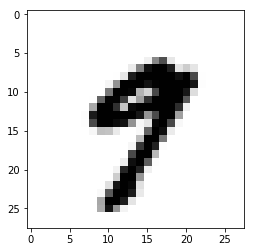

In [174]:
testing(real_y,predict_y,test_X,20)